## Importing Necessary Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from warnings import filterwarnings
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [36]:
load_breast_cancer()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

## Data Preprocessing/Preparation


In [3]:
cancer_data=pd.DataFrame(load_breast_cancer().data,columns=load_breast_cancer().feature_names)
cancer_data[['target']]=load_breast_cancer().target
cancer_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
X=load_breast_cancer().data
y=load_breast_cancer().target

In [5]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
y
#where 0=Malignant and 1 =Benign

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12)

In [8]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [9]:
filterwarnings('ignore')

## Model Building

In [10]:
#Logistic Regression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

#Decision Tree
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=3)
dt_model.fit(X_train,y_train)

#Ada Boosting
ab_model=AdaBoostClassifier()
ab_model.fit(X_train,y_train)

#Gradient Boosting
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

## Hyperparameter Tweaking With GridSearch CV

In [11]:
#Decision Tree
from sklearn.model_selection import GridSearchCV
grid_model_dt=GridSearchCV(estimator=dt_model,param_grid={'criterion':['gini','entropy'],
                                            'max_depth':[3,5,7,8,10],
                                            'min_samples_split':[2,3,4]})
grid_model_dt.fit(X_train,y_train)
print(grid_model_dt.best_params_)
print(grid_model_dt.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 3}
0.945054945054945


## Model Testing

##### Testing for Train Data

In [12]:
y_pred_train_lr=lr_model.predict(X_train)
y_pred_train_dt=dt_model.predict(X_train)
y_pred_train_ab=ab_model.predict(X_train)
y_pred_train_gb=gb_model.predict(X_train)

##### Testing for Test Data

In [13]:
y_pred_test_lr=lr_model.predict(X_test)
y_pred_test_dt=dt_model.predict(X_test)
y_pred_test_ab=ab_model.predict(X_test)
y_pred_test_gb=gb_model.predict(X_test)

## Model Evaluation

##### Training Data Prediction Evaluation

In [14]:
#Logistic Regression
print(confusion_matrix(y_train,y_pred_train_lr))
#Decision Tree
print(confusion_matrix(y_train,y_pred_train_dt))
#Ada Boosting
print(confusion_matrix(y_train,y_pred_train_ab))
#Gradient Boosting
print(confusion_matrix(y_train,y_pred_train_gb))

[[152  12]
 [ 10 281]]
[[164   0]
 [  0 291]]
[[164   0]
 [  0 291]]
[[164   0]
 [  0 291]]


In [15]:
print(classification_report(y_train,y_pred_train_lr))
print(classification_report(y_train,y_pred_train_ab))
print(classification_report(y_train,y_pred_train_ab))
print(classification_report(y_train,y_pred_train_gb))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       164
           1       0.96      0.97      0.96       291

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       291

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       291

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

              preci

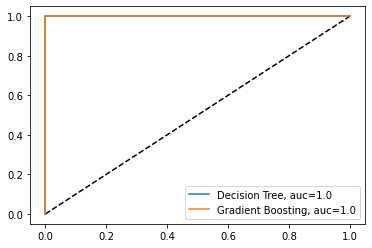

In [16]:
plt.figure(0).clf()

#Decision Tree
fpr, tpr, thresh = roc_curve(y_train,y_pred_train_dt)
auc = roc_auc_score(y_train,y_pred_train_dt)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))

#Gradient Boosting
fpr, tpr, thresh = roc_curve(y_train,y_pred_train_gb)
auc = roc_auc_score(y_train,y_pred_train_gb)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Gradient Boosting, auc="+str(auc))

plt.legend(loc=0)

##### Testing Data Prediction Evaluation

In [17]:
#Logistic Regression
print(confusion_matrix(y_test,y_pred_test_lr))
#Decision Tree
print(confusion_matrix(y_test,y_pred_test_dt))
#Ada Boosting
print(confusion_matrix(y_test,y_pred_test_ab))
#Gradient Boosting
print(confusion_matrix(y_test,y_pred_test_gb))

[[40  8]
 [ 0 66]]
[[44  4]
 [ 2 64]]
[[42  6]
 [ 1 65]]
[[42  6]
 [ 1 65]]


In [18]:
print(classification_report(y_test,y_pred_test_lr))
print(classification_report(y_test,y_pred_test_dt))
print(classification_report(y_test,y_pred_test_ab))
print(classification_report(y_test,y_pred_test_gb))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        48
           1       0.89      1.00      0.94        66

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        48
           1       0.94      0.97      0.96        66

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

              precision    recall  f1-score   support

           0       0.98      0.88      0.92        48
           1       0.92      0.98      0.95        66

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

              preci

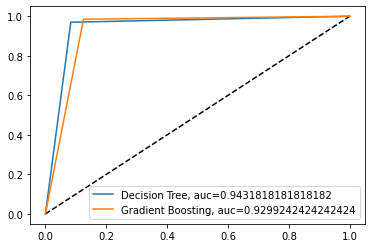

In [19]:
plt.figure(0).clf()

#Decision Tree
fpr, tpr, thresh = roc_curve(y_test,y_pred_test_dt)
auc = roc_auc_score(y_test,y_pred_test_dt)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))

#Gradient Boosting
fpr, tpr, thresh = roc_curve(y_test,y_pred_test_gb)
auc = roc_auc_score(y_test,y_pred_test_gb)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Gradient Boosting, auc="+str(auc))

plt.legend(loc=0)

## Checking Processing Speed

In [20]:
X.shape,y.shape

((569, 30), (569,))

In [21]:
%%time
ab_model.fit(X_train,y_train)

Wall time: 89.1 ms


AdaBoostClassifier()

In [22]:
%%time
gb_model.fit(X_train,y_train)

Wall time: 234 ms


GradientBoostingClassifier()

In [23]:
X=np.repeat(X,repeats=300,axis=0)
y=np.repeat(y,repeats=300,axis=0)

In [24]:
X.shape,y.shape

((170700, 30), (170700,))

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12)

In [26]:
#Ada Boosting
ab_model=AdaBoostClassifier()
ab_model.fit(X_train,y_train)

#Gradient Boosting
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [27]:
%%time
ab_model.fit(X_train,y_train)

Wall time: 7.6 s


AdaBoostClassifier()

In [28]:
%%time
gb_model.fit(X_train,y_train)

Wall time: 30.5 s


GradientBoostingClassifier()

In [35]:
#Processing time with Jupyter ipynb. using CPU
condition=('Without Repeat (ms)', 'With Repeat (s)')
pd.DataFrame({'AB':[89.1,7.6],
             'GB':[234,30.5]},index=condition)

,AB,GB
Without Repeat (ms),89.1,234.0
With Repeat (s),7.6,30.5
